In [1]:
from GSplineTransformer import GPU_SplineTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

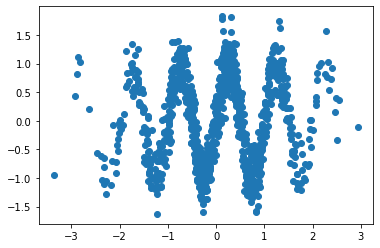

In [2]:
num_X = 1000
X = np.random.normal(size=(num_X, 1))
e = np.random.normal(0, 0.3, size=(num_X, 1))
y = np.sin(2 * 3.14 * X) + e

plt.scatter(X, y)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
mySpline = GPU_SplineTransformer(degree=3, n_knots=30, extrapolation="constant")
reg = LinearRegression().fit(mySpline.fit_transform(X_train), y_train)

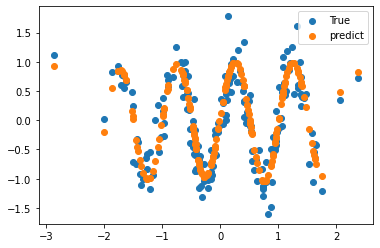

In [4]:
plt.scatter(X_test, y_test, label='True')
plt.scatter(X_test, reg.predict(mySpline.transform(X_test)), label='predict')
plt.legend()